In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.append("../")
from datetime import datetime#, timedelta
from utils import db_utils
from utils import iefp_data_utils

In [2]:
def makeBarPlot(x,y,theTitle):
    sns.set(font_scale=2.0)
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    width = 0.3
    #x.value_counts().plot(kind="bar")
    (x.value_counts()/len(x)).plot(kind='bar', color='red', ax=ax, width=width, position=1,title=theTitle)
    (y.value_counts()/len(y)).plot(kind='bar', color='blue', ax=ax, width=width, position=2)
    
    #df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

#ax.set_ylabel('Amount')
#ax2.set_ylabel('Price')

    
    
 #   plt.hist([x.value_counts(), y.value_counts()], color=['r','b'], alpha=0.5)
    #x.value_counts(normalize=True).plot(kind="bar")
    #y.histo()
    
    
    
    

In [3]:
def makeHistogram(x,y,theTitle,theBins,theRange):
    
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    
    #x.value_counts().plot(kind="bar")
    x.hist(ax=ax,bins=theBins,normed=True,color='red',alpha=1.0,range=theRange)
    y.hist(ax=ax,bins=theBins,normed=True,color='blue',alpha=0.5,range=theRange)
    #(y.hist(kind='bar', color='blue', ax=ax, width=width, position=2)
    
    #df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

#ax.set_ylabel('Amount')
#ax2.set_ylabel('Price')

    
    
 #   plt.hist([x.value_counts(), y.value_counts()], color=['r','b'], alpha=0.5)
    #x.value_counts(normalize=True).plot(kind="bar")
    #y.histo()
    

In [4]:
def findMainBucket(profession):
    profDict={1:"Managment",2:"Higer level professionals",3:"Lower level professionals",4:"Office jobs",5:"Sales",
              6:"Fising and farming",7:"Craft and trade",8:"Factory work",9:"Elementary professions"}
    if pd.isnull(profession):
        return np.nan
    else:
        professionInt=int(str(profession)[0:1])
        return profDict[professionInt]
    

,application_id,app_start_date,ltu,age,time_since_exit,number_dependence,experience_intended_prof,experience_prev_prof,gender_F,gender_M,...,previous_prof_Unknown,training_area_Agriculture,training_area_ArtsAndHumanities,training_area_Education,training_area_EngineeringAndConstruction,training_area_HealthAndSocialProtection,training_area_STEM,training_area_Service,training_area_SocialScienceTradeAndLaw,training_area_Unkown
0,120687,2016-12-06 00:00:00,True,44,1928.0,2.0,36.0,36.0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,50137,2011-07-27 00:00:00,True,36,41.0,0.0,48.0,36.0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,109085,2016-01-26 00:00:00,True,40,181.0,0.0,48.0,36.0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,63160,2012-07-04 00:00:00,True,36,94.0,0.0,120.0,120.0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,109120,2016-01-19 00:00:00,True,39,3405.0,0.0,240.0,240.0,0,1,...,0,0,0,0,0,0,0,0,0,1


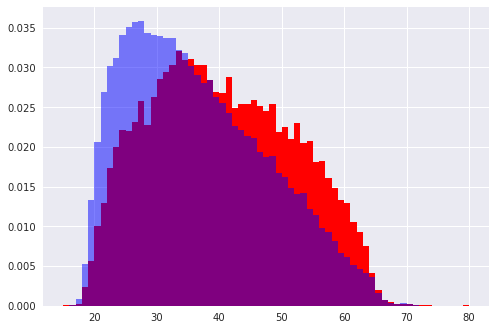

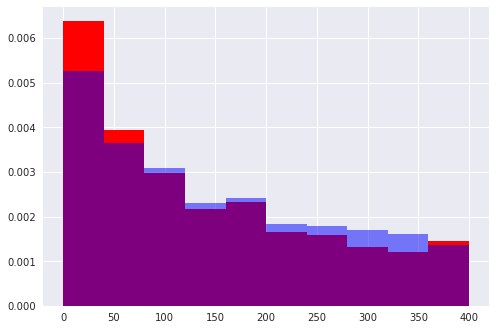

In [18]:
ltu=data[data["ltu"]==True]
nonltu=data[data["ltu"]==False]


makeHistogram(ltu["age"],nonltu["age"],"age",65,[15,80])
#makeHistogram(ltu["experience_prev_prof"]/12,nonltu["experience_prev_prof"]/12,"experience in previous profession",10,[0,36])

#looks like people who are longterm unemployed has often recently been in the system
makeHistogram(ltu["time_since_exit"].dropna(),nonltu["time_since_exit"].dropna(),"time since exit",10,[0,400])
ltu.head()

In [6]:
#data=pd.read_csv('/mnt/data/shared/workingData/iefp/feature_matrix/data_matrix.csv')
#data.columns
#data["intended_prof_1"]=data["intended_prof_1"].apply(findMainBucket)
#data["intended_prof_2"]=data["intended_prof_2"].apply(findMainBucket)
#data["intended_prof_1"].value_counts(dropna=False)
##data["intended_prof_1"].fillna(,inplace=True)
#data["intended_prof_1"].value_counts(dropna=False)
##print pd.isnull(data["intended_prof_1"])
#data["test"]=np.where(pd.isnull(data["intended_prof_1"]) & pd.isnull(data['intended_prof_2']),"er null","er ikke null")
#data["intended_prof"]=np.where(pd.isnull(data["intended_prof_1"]),data["intended_prof_2"],data["intended_prof_1"])
#data["intended_prof"].value_counts()
##print data.head()
#data["year"]=data["app_start_date"].apply(lambda x:pd.to_datetime(x).year)
#data=data[data["year"]>2007]
#print data["intended_prof"].value_counts()


shape (106974, 3)


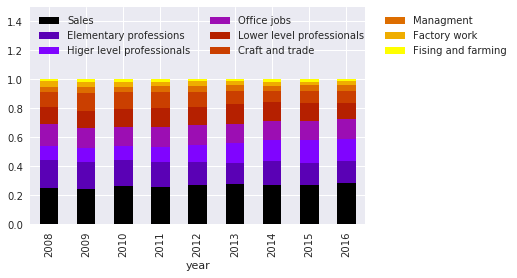

In [77]:
plotFrame=data[["application_id","year","intended_prof"]]
print "shape",plotFrame.shape
plotFrame=DataFrame(plotFrame.groupby(["year","intended_prof"]).count())
#print plotFrame.head(100)
plotFrame=plotFrame.unstack(level=1)
#plotFrame.head(100)
plotFrame=plotFrame.xs("application_id",axis=1,drop_level=True)
plotFrame.sort_values(by=2016,ascending=False,axis=1,inplace=True)
columnsOrder=plotFrame.columns.values
plotFrame.loc[:, 'total'] = plotFrame.sum(axis=1)
#cancel_reasons.div(cancel_reasons.loc[:, 'total'], axis=0)
ax=plotFrame.div(plotFrame.loc[:,'total'],axis=0).drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,1.5])
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left',ncol=3)

#print ax
#lines, labels = ax.get_legend_handles_labels()
#ax.legend([lines[0], lines[2]], ["Bounds", "Value"])
#plt.figure
#plt.show()


#movements.loc[:, 'year'] = movements.loc[:, 'movement_event_date'].map(lambda x: x.year)
#cancel_reasons = DataFrame(movements[movements['movement_type']=='cancellation'].groupby(['year','movement_subtype']).count())
#cancel_reasons = cancel_reasons.unstack(level=-1)
#cancel_reasons = cancel_reasons.xs('ute_id', axis=1, drop_level=True)
#cancel_reasons.loc[:, 'total'] = cancel_reasons.sum(axis=1)
#cancel_reasons.sort_values(by = 2017, ascending=False, axis=1, inplace=True)



#data=data[data["test"]=="er null"]
#print data.shape
#df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three'])
#                     , df['one'], np.nan)]                           
    
    
                           #,data['indended_prof_2'])#&pd.isnull(data['intended_prof_2']))

#print data["compare"]
#& (df['one'] <= df['three'])
#                     , df['one'], np.nan)



#print test.tail()
#data["intended_prof_1"].value_counts()

#ltu=data[data["ltu"]==True]
#nonltu=data[data["ltu"]==False]
#newDataframe=pd.DataFrame
#for x in ltu.columns.values:
    #pass
#    makeBarPlot(ltu[x],nonltu[x],x)
#makeBarPlot(ltu["soc_ben"],nonltu["soc_ben"],"Recives social benefits")
#makeBarPlot()
#makeBarPlot(ltu["civil_status"],nonltu["civil_status"],"Civil status")


shape (35420, 3)
shape (9, 9)


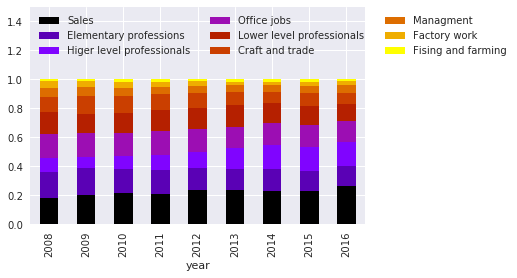

In [80]:
dataltu=data[data["ltu"]==True]
plotFrame=dataltu[["application_id","year","intended_prof"]]
print "shape",plotFrame.shape
plotFrame=DataFrame(plotFrame.groupby(["year","intended_prof"]).count())
#print plotFrame.head(100)
plotFrame=plotFrame.unstack(level=1)
#plotFrame.head(100)
plotFrame=plotFrame.xs("application_id",axis=1,drop_level=True)
print "shape",plotFrame.shape
plotFrame=plotFrame[columnsOrder]
#plotFrame.sort_values(by=2016,ascending=False,axis=1,inplace=True)
plotFrame.loc[:, 'total'] = plotFrame.sum(axis=1)
#cancel_reasons.div(cancel_reasons.loc[:, 'total'], axis=0)
ax=plotFrame.div(plotFrame.loc[:,'total'],axis=0).drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,1.5])
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left',ncol=3)






shape (71554, 3)
shape (9, 9)


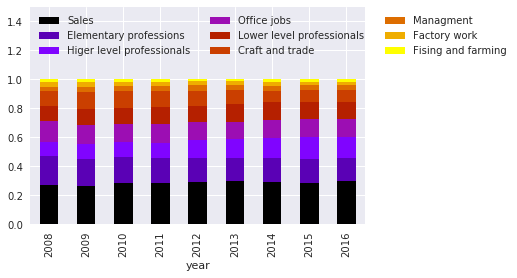

In [60]:
datanonltu=data[data["ltu"]==False]
plotFrame=datanonltu[["application_id","year","intended_prof"]]
print "shape",plotFrame.shape
plotFrame=DataFrame(plotFrame.groupby(["year","intended_prof"]).count())
#print plotFrame.head(100)
plotFrame=plotFrame.unstack(level=1)
#plotFrame.head(100)
plotFrame=plotFrame.xs("application_id",axis=1,drop_level=True)
print "shape",plotFrame.shape
plotFrame.sort_values(by=2016,ascending=False,axis=1,inplace=True)
plotFrame.loc[:, 'total'] = plotFrame.sum(axis=1)
#cancel_reasons.div(cancel_reasons.loc[:, 'total'], axis=0)
ax=plotFrame.div(plotFrame.loc[:,'total'],axis=0).drop("total",axis=1).plot(kind="bar",stacked=True,colormap="gnuplot",ylim=[0,1.5])
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left',ncol=3)




NameError: name 'ltu' is not defined